# Group Project: Arxiv Classifier
Authors: Amir Yunus, Brandon Gay, Lee Oon Teng

In [1]:
from utils import load_data, split_data, save_model
from utils.architecture.convolutional_neural_network import ConvolutionalNeuralNetwork

# 11 - $M_7$: Convolutional Neural Network with Balanced Dataset


## 11.1 - Load the Data

In [2]:
filename = 'arxiv'
df = load_data(f'../data/03_{filename}_engineered.bin')
df.shape

,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,...,title_sentiment,summary_sentiment,comment_sentiment,authors_sentiment,title_ari,summary_ari,comment_ari,authors_ari,category,split
0,-0.316280,0.338162,0.180578,-0.086113,-0.247716,0.640725,0.333832,0.832219,-0.262952,0.072209,...,0.600000,0.451058,0.50,0.5,1.0,1.0,1.0,1.0,physics,train
1,-0.271645,0.228114,0.203795,-0.257775,-0.083051,0.499957,0.471172,0.737172,-0.135142,0.213080,...,0.530556,0.406599,0.50,0.5,1.0,1.0,1.0,1.0,physics,train
2,-0.380401,0.264061,0.162928,-0.187630,-0.171296,0.660988,0.372280,0.938673,-0.259530,-0.110329,...,0.608333,0.529045,0.70,0.5,1.0,1.0,1.0,1.0,physics,train
3,-0.496275,0.129620,0.048845,0.000629,-0.320589,0.458095,0.439276,0.694186,-0.358091,-0.272360,...,0.312500,0.441523,0.65,0.5,1.0,1.0,1.0,1.0,mathematics,train
4,-0.163396,0.336321,0.343406,-0.162484,-0.134234,0.729687,0.424456,0.891292,-0.304655,0.020353,...,0.490000,0.472394,0.50,0.5,1.0,1.0,1.0,1.0,physics,train


(58816, 3158)

## 11.2 - Split the Data

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, balance_data=True)

Train set: 1608 samples
Validation set: 656 samples
Test set: 200 samples

Samples per category after balancing:

Train set:
category
physics                                       201
mathematics                                   201
electrical engineering and systems science    201
computer science                              201
quantitative biology                          201
economics                                     201
statistics                                    201
quantitative finance                          201
Name: count, dtype: int64

Validation set:
category
computer science                              82
statistics                                    82
physics                                       82
mathematics                                   82
quantitative finance                          82
electrical engineering and systems science    82
quantitative biology                          82
economics                                     82
Name: count, dtype: in

## 11.3 - Create the Model Object

In [4]:
m7_model = ConvolutionalNeuralNetwork(input_dim=X_train.shape[1], learning_rate=1e-4)

Using device: mps


## 11.4 - Train the Model

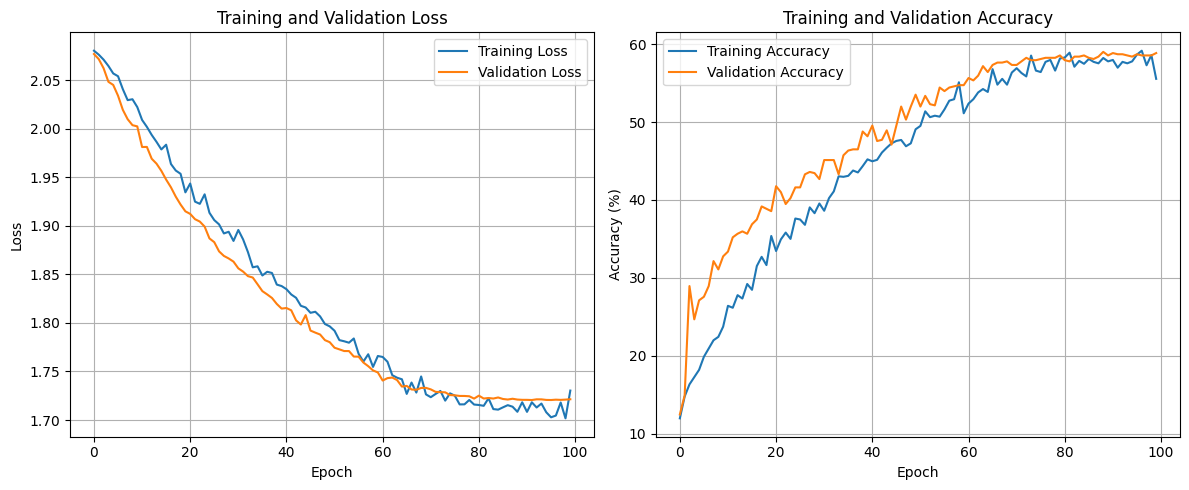

Training: 100%|██████████| 100/100 [01:46<00:00,  1.06s/it, train_loss=1.7303, val_loss=1.7214, train_acc=55.53%, val_acc=58.84%]


In [5]:
train_loss, val_loss = m7_model.fit(X_train, y_train, X_val, y_val)

## 11.5 - Evaluate the Model


Classification Report:
                                            precision    recall  f1-score   support

                          computer science       0.50      0.12      0.19        25
                                 economics       0.46      0.44      0.45        25
electrical engineering and systems science       0.45      0.68      0.54        25
                               mathematics       0.68      0.84      0.75        25
                                   physics       0.72      0.72      0.72        25
                      quantitative biology       0.65      0.60      0.62        25
                      quantitative finance       0.58      0.56      0.57        25
                                statistics       0.48      0.56      0.52        25

                                  accuracy                           0.56       200
                                 macro avg       0.57      0.56      0.55       200
                              weighted avg       0

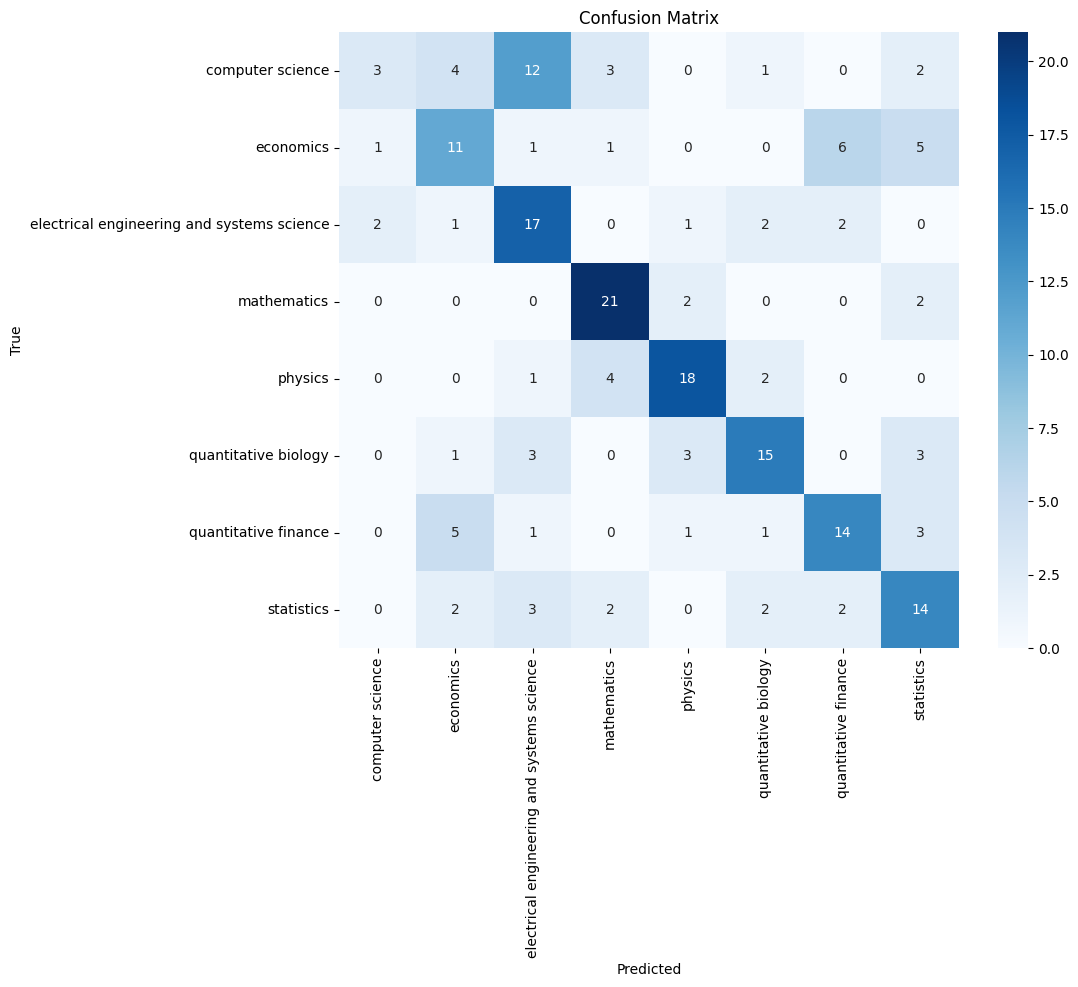

array(['mathematics', 'physics',
       'electrical engineering and systems science', 'physics',
       'mathematics', 'physics', 'physics', 'physics', 'physics',
       'physics', 'physics', 'physics', 'physics', 'physics',
       'quantitative biology', 'physics', 'mathematics', 'physics',
       'mathematics', 'quantitative biology', 'physics', 'physics',
       'physics', 'physics', 'physics',
       'electrical engineering and systems science',
       'electrical engineering and systems science', 'computer science',
       'economics', 'economics',
       'electrical engineering and systems science', 'mathematics',
       'electrical engineering and systems science', 'mathematics',
       'electrical engineering and systems science', 'statistics',
       'electrical engineering and systems science', 'economics',
       'electrical engineering and systems science',
       'quantitative biology',
       'electrical engineering and systems science',
       'electrical engineering and

In [6]:
m7_model.predict(X_test, y_test)

## 11.6 - Save the Model

In [7]:
save_model(m7_model, '../models/m7_bert_neural_network.bin')


Model saved successfully to ../models/m7_bert_neural_network.bin
